In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
citiesDf = pd.read_csv(city_data_to_load) 
ridesDf = pd.read_csv(ride_data_to_load) 

# Combine the data into a single dataset
citiesFullDf = ridesDf.merge(citiesDf, on='city', how='left')

# Display the data table for preview
citiesFullDf.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [ ]:
citiesFullDf.info()
# ridesDf.info()

## Bubble Plot of Ride Sharing Data

In [3]:
urbanCitiesDf = citiesFullDf.loc[citiesFullDf["type"]=='Urban',:]
urbanCitiesDf.loc[:,'fareAvgPerCity'] = urbanCitiesDf['fare'].groupby(urbanCitiesDf['city']).transform('mean')
urbanCitiesDf.loc[:,'ridesCountPerCity'] = urbanCitiesDf['date'].groupby(urbanCitiesDf['city']).transform('count')
urbanCitiesDf = urbanCitiesDf.drop_duplicates(subset ="city") 
urbanCitiesDf.head()

,city,date,fare,ride_id,driver_count,type,fareAvgPerCity,ridesCountPerCity
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban,23.425833,24
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban,24.451613,31
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban,25.642800,25
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban,28.616957,23
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban,22.965263,19


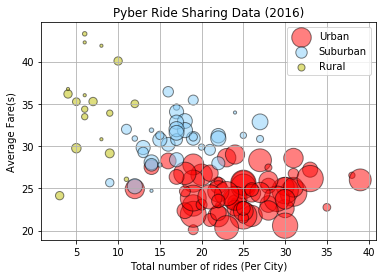

<Figure size 432x288 with 0 Axes>

In [30]:
# Obtain the x and y coordinates for each of the three city types
urbanCitiesDf = citiesFullDf.loc[citiesFullDf["type"]=='Urban',:]
urbanCitiesDf.loc[:,'fareAvgPerCity'] = urbanCitiesDf['fare'].groupby(urbanCitiesDf['city']).transform('mean')
urbanCitiesDf.loc[:,'ridesCountPerCity'] = urbanCitiesDf['date'].groupby(urbanCitiesDf['city']).transform('count')
urbanCitiesDf = urbanCitiesDf.drop_duplicates(subset ="city") 
urbanCitiesDf.head()

suburbanCitiesDf = citiesFullDf.loc[citiesFullDf["type"]=='Suburban',:]
suburbanCitiesDf.loc[:,'fareAvgPerCity'] = suburbanCitiesDf['fare'].groupby(suburbanCitiesDf['city']).transform('mean')
suburbanCitiesDf.loc[:,'ridesCountPerCity'] = suburbanCitiesDf['date'].groupby(suburbanCitiesDf['city']).transform('count')
suburbanCitiesDf = suburbanCitiesDf.drop_duplicates(subset ="city") 
suburbanCitiesDf.head()

ruralCitiesDf = citiesFullDf.loc[citiesFullDf["type"]=='Rural',:]
ruralCitiesDf.loc[:,'fareAvgPerCity'] = ruralCitiesDf['fare'].groupby(ruralCitiesDf['city']).transform('mean')
ruralCitiesDf.loc[:,'ridesCountPerCity'] = ruralCitiesDf['date'].groupby(ruralCitiesDf['city']).transform('count')
ruralCitiesDf = ruralCitiesDf.drop_duplicates(subset ="city") 
ruralCitiesDf.head()

# Build the scatter plots for each city types
plt.scatter(urbanCitiesDf['ridesCountPerCity'], urbanCitiesDf['fareAvgPerCity'], s=urbanCitiesDf['driver_count']*10, 
            alpha=0.5, c='r', label='Urban', edgecolors='k')
plt.scatter(suburbanCitiesDf['ridesCountPerCity'], suburbanCitiesDf['fareAvgPerCity'], s=suburbanCitiesDf['driver_count']*10, 
            alpha=0.5, c='lightskyblue', label='Suburban', edgecolors='k')
plt.scatter(ruralCitiesDf['ridesCountPerCity'], ruralCitiesDf['fareAvgPerCity'], s=ruralCitiesDf['driver_count']*10, 
            alpha=0.5, c='y', label='Rural', edgecolors='k')


# Incorporate the other graph properties
plt.grid()

# Create a legend
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total number of rides (Per City)")
plt.ylabel("Average Fare(s)")

# Incorporate a text label regarding circle size
plt.legend(loc='upper right')
plt.show()

# Save Figure
plt.savefig('pyber_rides_2016.png')

In [5]:
# Show plot
plt.show()

## Total Fares by City Type

In [6]:
totalPercentageFaresPerCity = (citiesFullDf.groupby("type").sum()['fare'] * 100) / citiesFullDf['fare'].sum()
totalPercentageFaresPerCity


type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

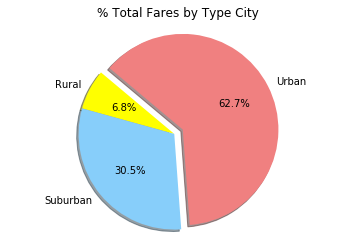

In [7]:
colors = ["yellow",  "lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.pie(totalPercentageFaresPerCity.tolist(), explode=explode, labels=totalPercentageFaresPerCity.index.tolist(), colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% Total Fares by Type City")

plt.axis("equal")
plt.savefig("Total Fares by City Type.png")
plt.show()

In [ ]:
# Show Figure
plt.show()

## Total Rides by City Type

In [12]:
citiesFullDf.head()
ridesPercentagePerCity = (citiesFullDf.groupby("type").count()['ride_id'] * 100) / citiesFullDf['ride_id'].count()
ridesPercentagePerCity

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

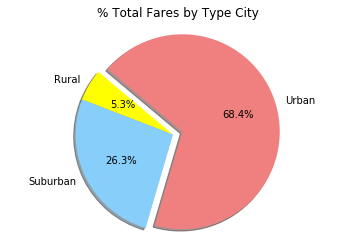

In [17]:
colors = ["yellow",  "lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.pie(ridesPercentagePerCity.tolist(), explode=explode, labels=ridesPercentagePerCity.index.tolist(), colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% Total Rides by Type City")

plt.axis("equal")
plt.savefig("Total Rides by City Type.png")
plt.show()

In [ ]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [29]:
citiesFullDf.head()
citiesFullDf_ = citiesFullDf.drop_duplicates(subset ="city") 
driversPercentagePerCity = (citiesFullDf_.groupby("type").sum()['driver_count'] * 100) / citiesFullDf_['driver_count'].sum()
driversPercentagePerCity

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

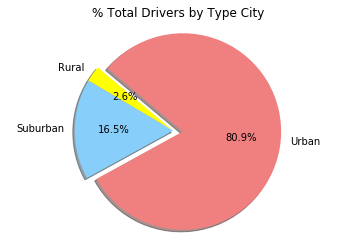

In [28]:
colors = ["yellow",  "lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.pie(driversPercentagePerCity.tolist(), explode=explode, labels=driversPercentagePerCity.index.tolist(), colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% Total Drivers by Type City")

plt.axis("equal")
plt.savefig("Total Drivers by City Type.png")
plt.show()

In [ ]:
# Show Figure
plt.show()